# 1. Data Acquisition and Preprocessing.

In [1]:
import os
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from zlib import crc32
from sklearn.model_selection import train_test_split

In [2]:
# Define the data directory. It must be a directory outside the notebook directory.
data_dir = os.getcwd().split('notebooks')[0] + 'data/raw/'
data_processed = os.getcwd().split('notebooks')[0] + 'data/processed/'

# Create the directory if it does not exist.
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

if not os.path.exists(data_processed):
    os.makedirs(data_processed)

In [3]:
# Create full path to the downloaded file.
zip_file_path = os.path.join(data_dir, 'creditcardfraud.zip')

if not os.path.exists(zip_file_path):
    # Download the dataset to the specified directory.
    !kaggle datasets download -d mlg-ulb/creditcardfraud -p  {data_dir}
else:
    print("Dataset already downloaded.")


C:\Users\Felipe\python_work\Projects\ml_credit_fraud\ml-credit-card-fraud\.venv\Lib\site-packages\kaggle\api_client.py:260: SyntaxWarning: invalid escape sequence '\['
  sub_kls = re.match('list\[(.*)\]', klass).group(1)
C:\Users\Felipe\python_work\Projects\ml_credit_fraud\ml-credit-card-fraud\.venv\Lib\site-packages\kaggle\api_client.py:265: SyntaxWarning: invalid escape sequence '\('
  sub_kls = re.match('dict\(([^,]*), (.*)\)', klass).group(2)
C:\Users\Felipe\python_work\Projects\ml_credit_fraud\ml-credit-card-fraud\.venv\Lib\site-packages\kaggle\api\kaggle_api.py:1063: SyntaxWarning: invalid escape sequence '\&'
  """Creates (aka \&quot;drops\&quot;) a new file into the inbox.  # noqa: E501
C:\Users\Felipe\python_work\Projects\ml_credit_fraud\ml-credit-card-fraud\.venv\Lib\site-packages\kaggle\api\kaggle_api.py:1084: SyntaxWarning: invalid escape sequence '\&'
  """Creates (aka \&quot;drops\&quot;) a new file into the inbox.  # noqa: E501

  0%|          | 0.00/66.0M [00:00<?, ?B/s

In [4]:
# Create full path to the downloaded file.
zip_file_path = os.path.join(data_dir, 'creditcardfraud.zip')

# Unzip the downloaded file.
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

In [5]:
# Import the .csv file into a pandas DataFrame.
credit_card_data = pd.read_csv(f"{data_dir}creditcard.csv")

## Take a quick look at the data structure ##

In [6]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Based on the initial exploration of the dataset, we can make the following observations:

1. The dataset contains 31 columns, where each row represents a transaction.
2. The 'Time' column contains the seconds elapsed between each transaction and the first transaction in the dataset.
3. The 'V1' to 'V28' columns are the result of a PCA transformation. Unfortunately, we don't know exactly what these columns represent due to confidentiality issues.
4. The 'Amount' column is the transaction amount.
5. The 'Class' column is the response variable and it takes value 1 in case of fraud and 0 otherwise.

There are no null values, with a total of 284807 instances. All attributes are numerical.

In [8]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
credit_card_data[["Time", "Amount", "Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [10]:
# Represent the maximum time in hours.
credit_card_data["Time"].max() / 3600

47.99777777777778

We know that `Time` represents the seconds elapsed between each transaction and the first transaction in the dataset. Therefore, the dataset contains roughly 48 hours, or two days, worth in transaction period.
We can make a few observations on `Amount`:
- The mean value is 88 roughly.
- The standard deviation is around 250.
- Q1 is 5.60 - 25% of the data falls below this level.
- Q2 is 22, which means that half of the data is below this value.
- Q3 is around 77 and as such three quarters of the data is below such value. 
- The max value is significantly larger, 25691, indicating the existence of extreme values.
We know that `Class` is a categorical variable, and as such, we should treat it accordingly.

In [11]:
# Represent `Class` as a categorical variable and then apply describe method.
credit_card_data["Class"].astype("category")
credit_card_data["Class"].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

We can tell that most of the dataset contains `0`, which means no fraud detected. What is the percentage of fraudulent activites detected?

In [12]:
# Return the percentage of fraudulent transactions.
credit_card_data["Class"].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

There is only `0.127%` of observations marked as frauds.

### Visualize the distribution of the dataset ###

In [13]:
# Extra code - code to save the figures as high-quality images.

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Save the figure as a high-quality image.

    Parameters
    ----------
    fig_id : str
        The name of the figure.
    tight_layout : bool
        Whether to use tight layout.
    fig_extension : str
        The extension of the figure.
    resolution : int
        The resolution of the figure.
    """

    # Create a directory to save the figures.
    images_dir = os.getcwd().split('notebooks')[0] + 'assets/images/'

    # Create the directory if it does not exist.
    if not os.path.exists(images_dir):
        os.makedirs(images_dir)

    path = os.path.join(images_dir, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    # Check if the file already exists. If so, save the figure; if not, print a message.
    if not os.path.exists(path):
        print(f"Saving figure {fig_id} to {path}")
        plt.savefig(path, format=fig_extension, dpi=resolution)
    else:
        print(f"Figure {fig_id} already exists.")
        pass

Saving figure credit_card_data_histograms to c:\Users\Felipe\python_work\Projects\ml_credit_fraud\ml-credit-card-fraud\assets/images/credit_card_data_histograms.png


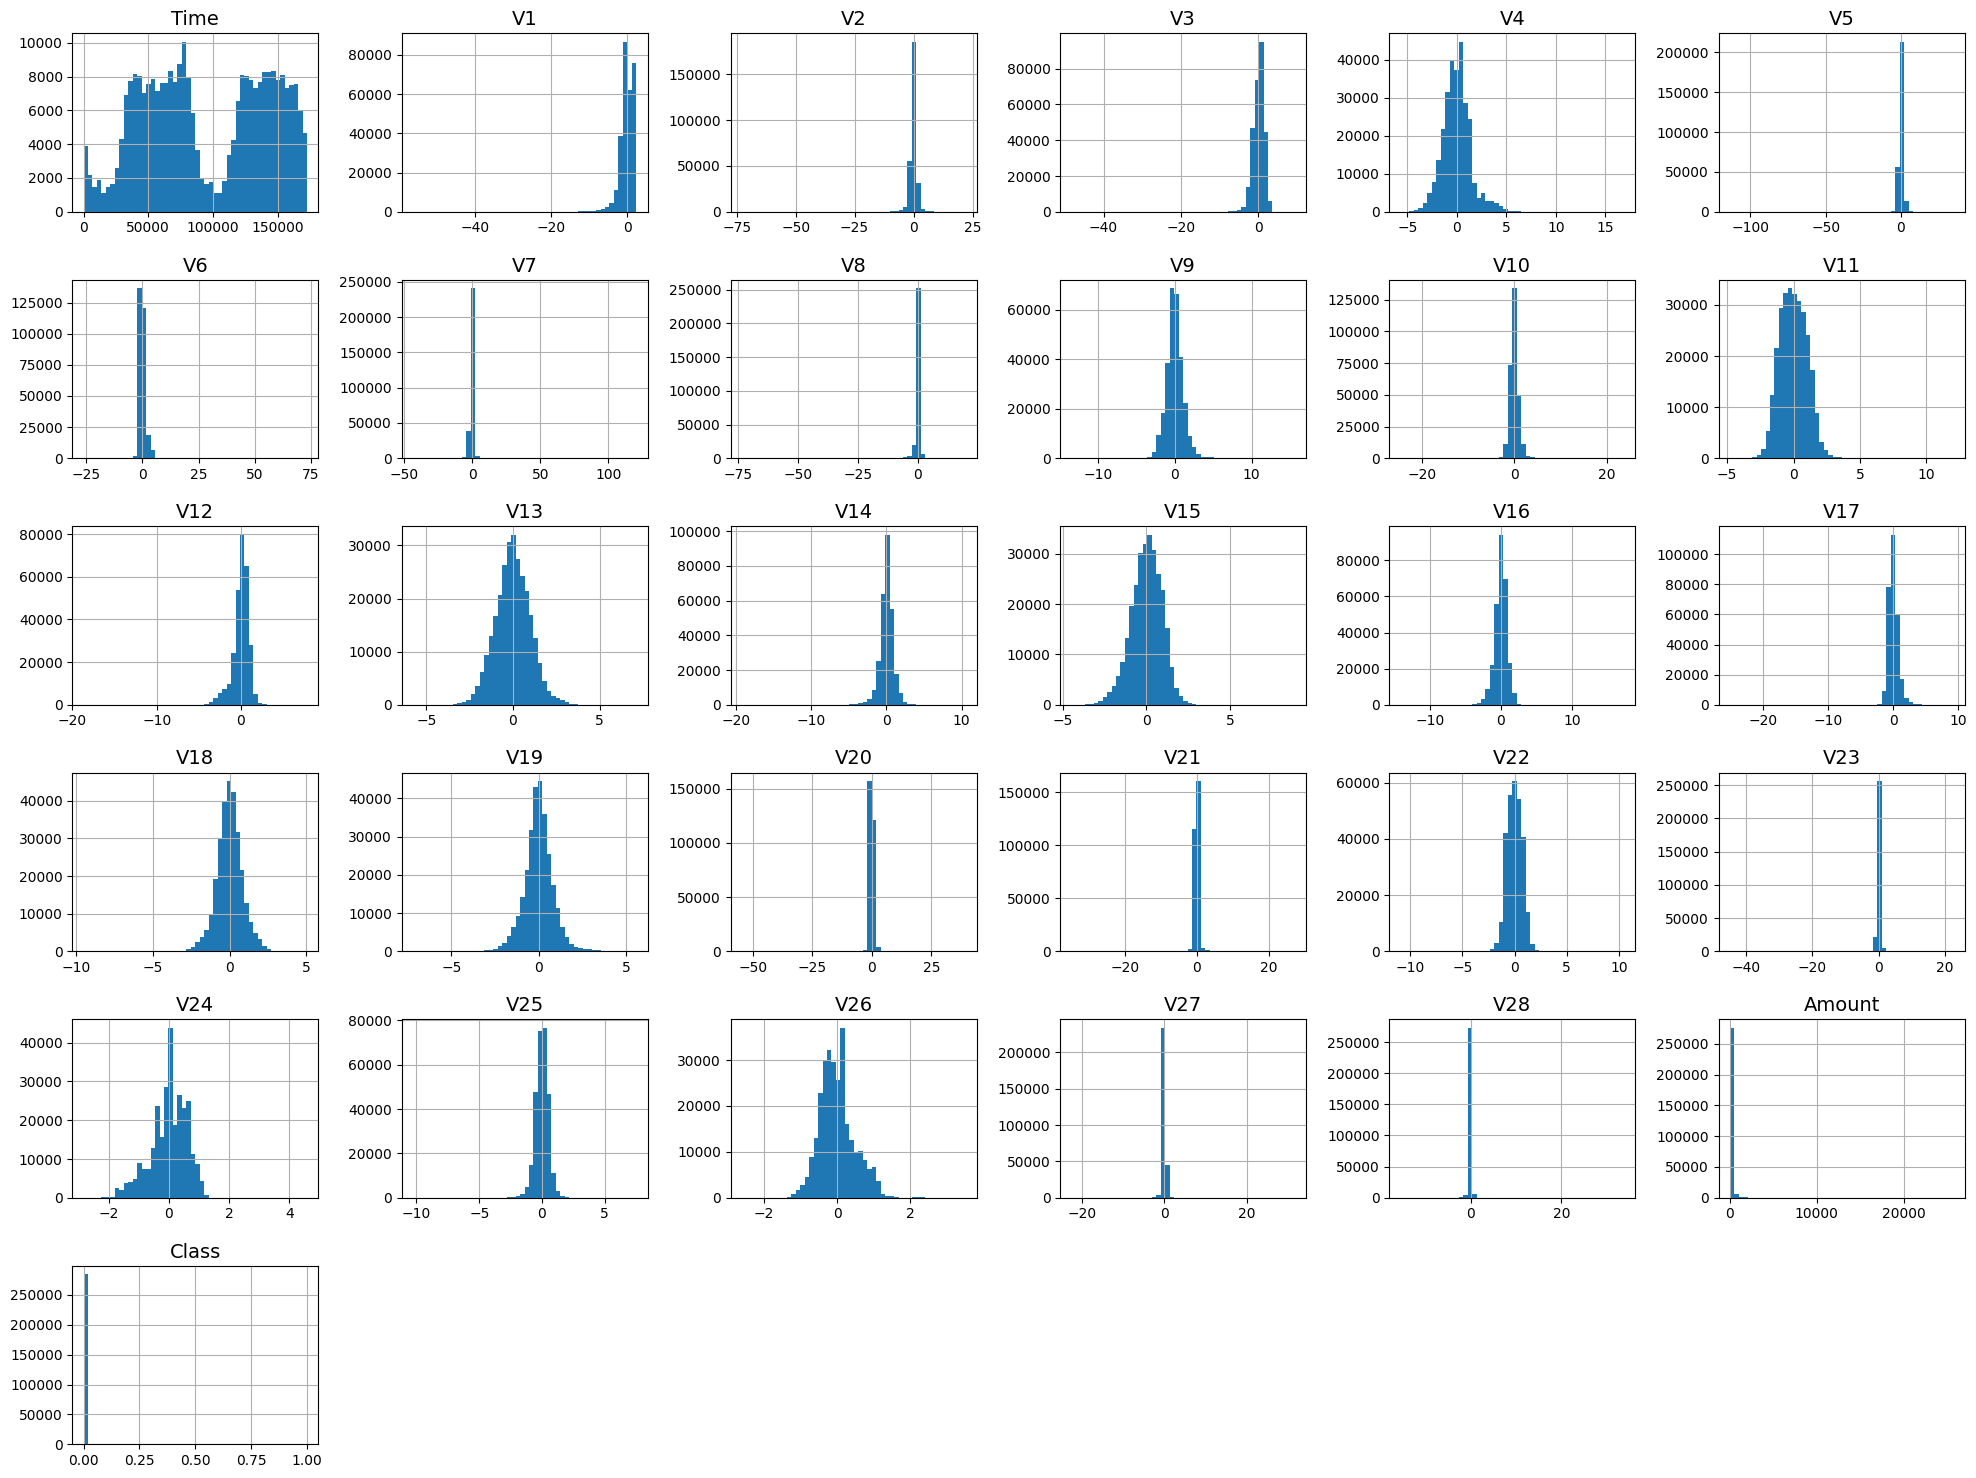

In [14]:
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

credit_card_data.hist(bins=50, figsize=(20, 15))
save_fig("credit_card_data_histograms")
plt.show()

The dataset's distribution looks normal. We can tell that many variables seem to present continuous values in a wider range at least. Others, meanwhile, present a high frequency for specific bins, suggesting that we may be dealing with categorical features. For now, we create a sample for our test set and move to the next notebook.

## Create a Test Set ##
Because our dataset is highly imbalanced, we want to create samples that correctly represent this distribution.

In [15]:
train_set, test_set = train_test_split(credit_card_data, test_size=0.2, stratify=credit_card_data["Class"], random_state=42)

In [16]:
train_set["Class"].value_counts(normalize=True) * 100

Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

Great, our test set correctly captured the proportion of fraudulent and non-fraudulent activities. Let's export our test and train sets as parquet and continue in a different notebook.

In [18]:
# Export as parquet the training and testing sets to the `processed` data directory.
train_set.to_parquet(f"{data_processed}train_set.parquet", index=False, engine="pyarrow")
test_set.to_parquet(f"{data_processed}test_set.parquet", index=False, engine="pyarrow")